In [1]:
import pandas as pd
import constants as constants

# Load the dataset from the provided Excel file
file_path = constants.PCOS_kaggle_filepath
pcos_data = pd.read_excel(file_path)

# Display the first few rows of the dataset and some summary statistics
pcos_data.head(), pcos_data.describe()

(   Instructions to be followed :  \
 0                            NaN   
 1                            1.0   
 2                            2.0   
 3                            3.0   
 4                            4.0   
 
                                           Unnamed: 1  Unnamed: 2 Unnamed: 3  
 0                                                NaN         NaN        NaN  
 1   Kindly ensure that the datas are converted to...         NaN        NaN  
 2    Please fill up the entire data set of a patient         NaN        NaN  
 3  Manipulated datas if any need to be highlighte...         NaN        NaN  
 4  For every Yes/No questions *** ,  Indicate Yes...         NaN        NaN  ,
        Instructions to be followed :  Unnamed: 2
 count                      12.000000         0.0
 mean                        6.500000         NaN
 std                         3.605551         NaN
 min                         1.000000         NaN
 25%                         3.750000         NaN
 

In [2]:
# Load the Excel file to check available sheets
excel_file = pd.ExcelFile(file_path)
excel_file.sheet_names

# Load the dataset from the 'Full_new' sheet
pcos_data = pd.read_excel(file_path, sheet_name='Full_new')

# Display the first few rows of the dataset and some summary statistics
pcos_data.head(), pcos_data.describe()


(   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
 0       1                 1           0          28         44.6        152.0   
 1       2                 2           0          36         65.0        161.5   
 2       3                 3           1          33         68.8        165.0   
 3       4                 4           0          37         65.0        148.0   
 4       5                 5           0          25         52.0        161.0   
 
          BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
 0  19.300000           15                78                22  ...   
 1  24.921163           15                74                20  ...   
 2  25.270891           11                72                18  ...   
 3  29.674945           13                72                20  ...   
 4  20.060954           11                72                18  ...   
 
    Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
 0             

In [3]:
# Check for missing values in the dataset
missing_data = pcos_data.isnull().sum()
missing_data[missing_data > 0]

Marraige Status (Yrs)      1
Fast food (Y/N)            1
Unnamed: 44              539
dtype: int64

In [4]:
# Drop the 'Unnamed: 44' column
pcos_data_cleaned = pcos_data.drop(columns=['Unnamed: 44'])

# Fill missing values in 'Marraige Status (Yrs)' and 'Fast food (Y/N)' with the median of the respective columns
pcos_data_cleaned['Marraige Status (Yrs)'].fillna(pcos_data_cleaned['Marraige Status (Yrs)'].median(), inplace=True)
pcos_data_cleaned['Fast food (Y/N)'].fillna(pcos_data_cleaned['Fast food (Y/N)'].mode()[0], inplace=True)

# Check again for missing values to confirm cleaning
pcos_data_cleaned.isnull().sum().sum()  # Total missing values in the dataset

/var/folders/mg/fqdc1l7n3d509tbxkv812ph80000gn/T/ipykernel_79501/3205294683.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pcos_data_cleaned['Marraige Status (Yrs)'].fillna(pcos_data_cleaned['Marraige Status (Yrs)'].median(), inplace=True)
/var/folders/mg/fqdc1l7n3d509tbxkv812ph80000gn/T/ipykernel_79501/3205294683.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work

0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select features and target
features_corrected = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ',
    'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
    'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Fast food (Y/N)'
]
target = 'PCOS (Y/N)'

# Split data into features and target using the corrected feature names
X_corrected = pcos_data_cleaned[features_corrected]
y = pcos_data_cleaned[target]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_corrected, y, test_size=0.25, random_state=42)

# Initialize and train Logistic Regression model
model_corrected = LogisticRegression(max_iter=1000)
model_corrected.fit(X_train, y_train)

# Predict on the test set
y_pred_corrected = model_corrected.predict(X_test)

# Evaluate the model
accuracy_corrected = accuracy_score(y_test, y_pred_corrected)
classification_rep_corrected = classification_report(y_test, y_pred_corrected)

accuracy_corrected, classification_rep_corrected

(0.8602941176470589,
 '              precision    recall  f1-score   support\n\n           0       0.89      0.90      0.90        94\n           1       0.78      0.76      0.77        42\n\n    accuracy                           0.86       136\n   macro avg       0.84      0.83      0.84       136\nweighted avg       0.86      0.86      0.86       136\n')

The logistic regression model performed quite well in predicting PCOS based on the selected features:

Accuracy: 86.03%
Precision for Class 1 (PCOS): 78%
Recall for Class 1 (PCOS): 76%
F1-Score for Class 1 (PCOS): 77%
These results suggest that the model is quite effective, with good balance between precision and recall for detecting PCOS cases.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load data
data = pd.read_excel('/content/PCOS_data_without_infertility.xlsx', sheet_name='Full_new')
# Assume data preprocessing and feature selection are done here

# Corrected feature names
features_corrected = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ',
    'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
    'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Fast food (Y/N)'
]
target = 'PCOS (Y/N)'

# Split data into features and target using the corrected feature names
X = pcos_data_cleaned[features_corrected]
y = pcos_data_cleaned[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Deep Learning Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluate the Deep Learning Model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)


Accuracy: 0.8602941176470589
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        94
           1       0.78      0.76      0.77        42

    accuracy                           0.86       136
   macro avg       0.84      0.83      0.84       136
weighted avg       0.86      0.86      0.86       136

Epoch 1/50
33/33 [==============================] - 2s 10ms/step - loss: 1.0988 - accuracy: 0.6389 - val_loss: 0.5204 - val_accuracy: 0.7407
Epoch 2/50
33/33 [==============================] - 0s 3ms/step - loss: 0.4710 - accuracy: 0.7747 - val_loss: 0.6156 - val_accuracy: 0.7284
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.7932 - val_loss: 0.6433 - val_accuracy: 0.6543
Epoch 4/50
33/33 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.7994 - val_loss: 0.6017 - val_accuracy: 0.7284
Epoch 5/50
33/33 [==============================] - 0s 3ms/step - loss: 0.5443 - ac

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load your dataset
file_path = '/content/PCOS_data_without_infertility.xlsx'
data = pd.read_excel(file_path, sheet_name='Full_new')

# Select features and the target
features = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ',
    'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
    'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Fast food (Y/N)'
]
target = 'PCOS (Y/N)'

X = data[features]
y = data[target]

# Data preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Output layer for two classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_cat, epochs=50, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_cat)
print(f'Test Accuracy: {accuracy:.2f}')


Epoch 1/50
11/11 [==============================] - 3s 61ms/step - loss: nan - accuracy: 0.6728 - val_loss: nan - val_accuracy: 0.6543
Epoch 2/50
11/11 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 3/50
11/11 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 4/50
11/11 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 5/50
11/11 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 6/50
11/11 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 7/50
11/11 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 8/50
11/11 [==============================] - 0s 

In [ ]:
#Dropout and early stopping
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataset
file_path = '/content/PCOS_data_without_infertility.xlsx'
data = pd.read_excel(file_path, sheet_name='Full_new')

# Select features and the target
features = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ',
    'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
    'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Fast food (Y/N)'
]
target = 'PCOS (Y/N)'

X = data[features]
y = data[target]

# Data preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Setup early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train_cat, epochs=100, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_cat)
print(f'Test Accuracy: {accuracy:.2f}')


Epoch 1/100
11/11 [==============================] - 4s 42ms/step - loss: nan - accuracy: 0.4784 - val_loss: nan - val_accuracy: 0.6543
Epoch 2/100
11/11 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 3/100
11/11 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 4/100
11/11 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 5/100
11/11 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 6/100
11/11 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 7/100
11/11 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.6698 - val_loss: nan - val_accuracy: 0.6543
Epoch 8/100
11/11 [=============================

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer

# Load data
data = pd.read_excel('/content/PCOS_data_without_infertility.xlsx', sheet_name='Full_new')

# Corrected feature names
features_corrected = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ',
    'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
    'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Fast food (Y/N)'
]
target = 'PCOS (Y/N)'

# Split data into features and target using the corrected feature names
X = data[features_corrected]
y = data[target]

# Impute missing values in the dataset
imputer = SimpleImputer(strategy='median')  # Using median to replace missing values
X_imputed = imputer.fit_transform(X)  # Apply imputation across the entire feature set

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Deep Learning Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the Deep Learning Model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Deep Learning Test Accuracy:', accuracy)


Logistic Regression Accuracy: 0.8602941176470589
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        94
           1       0.78      0.76      0.77        42

    accuracy                           0.86       136
   macro avg       0.84      0.83      0.84       136
weighted avg       0.86      0.86      0.86       136

Epoch 1/50
33/33 [==============================] - 2s 35ms/step - loss: 0.6136 - accuracy: 0.6975 - val_loss: 0.5200 - val_accuracy: 0.7901
Epoch 2/50
33/33 [==============================] - 0s 12ms/step - loss: 0.4433 - accuracy: 0.8642 - val_loss: 0.4215 - val_accuracy: 0.7901
Epoch 3/50
33/33 [==============================] - 0s 9ms/step - loss: 0.3482 - accuracy: 0.8920 - val_loss: 0.3818 - val_accuracy: 0.8025
Epoch 4/50
33/33 [==============================] - 0s 6ms/step - loss: 0.3006 - accuracy: 0.9012 - val_loss: 0.3751 - val_accuracy: 0.8148
Epoch 5/50
33/33 [==============================] - 0s 6ms/ste

Model Performance Summary
Logistic Regression Accuracy: 86.03%
Precision for Class 1 (PCOS): 78%
Recall for Class 1 (PCOS): 76%
F1-Score for Class 1 (PCOS): 77%
Deep Learning Test Accuracy: 84.56%

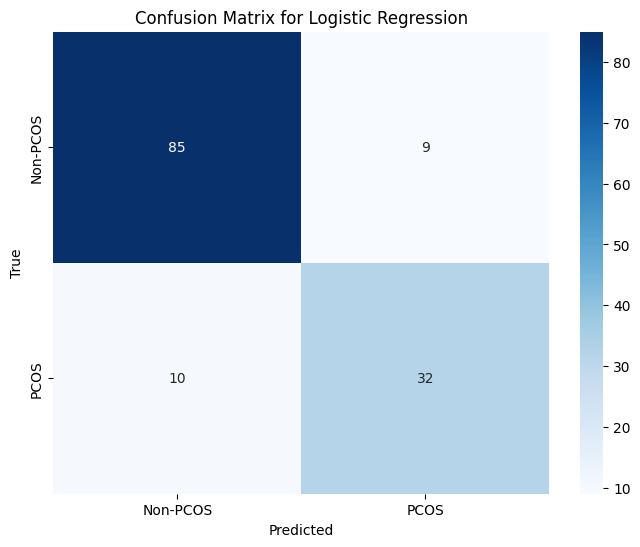

In [22]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix for logistic regression
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-PCOS', 'PCOS'], yticklabels=['Non-PCOS', 'PCOS'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Top-Left Square (True Negative): The number 85 represents the true negatives, which means that 85 times the model correctly predicted 'Non-PCOS'.
Top-Right Square (False Positive): The number 9 indicates the false positives, which means that 9 times the model incorrectly predicted 'PCOS' when it was actually 'Non-PCOS'.
Bottom-Left Square (False Negative): The number 10 represents the false negatives, indicating that 10 times the model incorrectly predicted 'Non-PCOS' when the truth was 'PCOS'.
Bottom-Right Square (True Positive): The number 32 represents the true positives, meaning the model correctly predicted 'PCOS' 32 times.
Interpreting the Confusion Matrix:
Accuracy: The model's accuracy is given by the sum of the true positives and true negatives divided by the total number of predictions. In this case, (85 + 32) / (85 + 9 + 10 + 32).
Precision for PCOS: The model's precision for predicting PCOS is the number of true positives divided by the total number of predicted positives (true positives + false positives). Here, it would be 32 / (32 + 9).
Recall for PCOS: The model's recall for predicting PCOS is the number of true positives divided by the total number of actual positives (true positives + false negatives). Here, it would be 32 / (32 + 10).

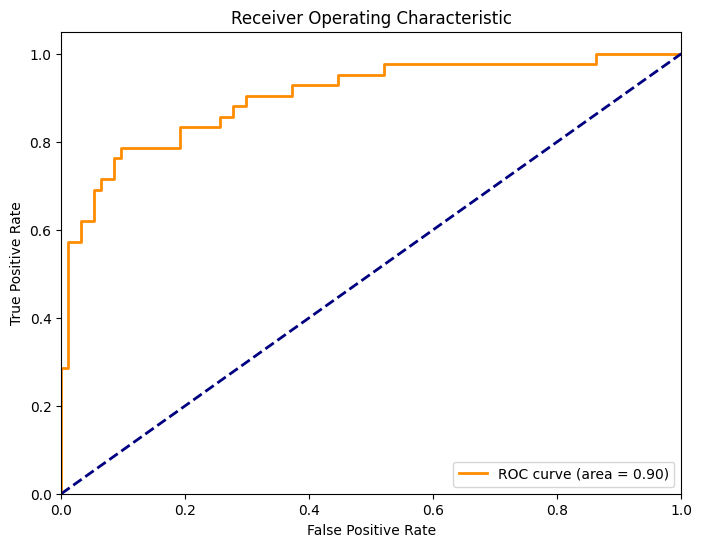

In [23]:
#ROC Curve and AUC Score
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


This plot is a Receiver Operating Characteristic (ROC) curve, which is a graphical representation of the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. Here's what the terms mean:

True Positive Rate (Sensitivity): The proportion of actual positives that are correctly identified by the model.
False Positive Rate (1 - Specificity): The proportion of actual negatives that are incorrectly identified by the model.
The dotted blue line represents a classifier with no discriminative ability (random guessing), and it serves as a baseline; a good classifier stays as far away from this line as possible (towards the top-left corner).

Key points about the ROC curve you've uploaded:

Orange Line: Represents your model's performance at various thresholds.
AUC (Area Under the Curve): The area under the ROC curve, mentioned as 0.90, indicates a very good level of separation between the positive and negative classes. AUC values range from 0 to 1, where:
0.5 signifies no discriminative ability (the same as random guessing),
0 to 0.5 signifies a model that is always wrong,
0.5 to 1 signifies levels from poor to excellent ability to discriminate between the positive and negative classes,
1 signifies a perfect model.
Your model's ROC curve is close to the top-left corner, indicating a high true positive rate and a low false positive rate, which is excellent. The AUC of 0.90 suggests that the model has a 90% chance of correctly distinguishing between the patient having PCOS and not having PCOS.

This is generally considered an excellent model, but it's always important to balance the ROC curve insight with other metrics, especially in domains like healthcare where the costs of false positives and false negatives can be very different.

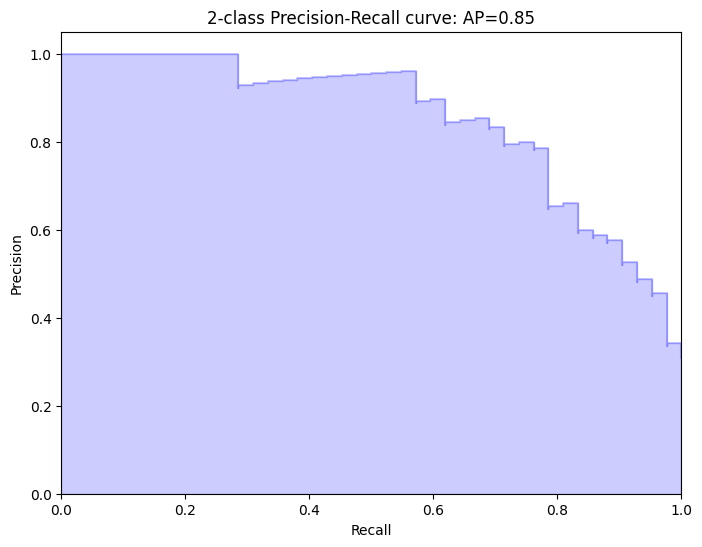

In [24]:
# 3. Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
average_precision = average_precision_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8,6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'2-class Precision-Recall curve: AP={average_precision:.2f}')
plt.show()

Precision: It indicates the proportion of positive identifications that were actually correct. Precision is on the y-axis and a higher value is better.
Recall (True Positive Rate): It shows the proportion of actual positives that were identified correctly. Recall is on the x-axis and a higher value is better.
AP (Average Precision): This summarizes the precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight. Here, the AP is 0.85, which indicates that the classifier has an average precision of 85% across all thresholds.
A perfect classifier would have a PR curve that hugs the right angle, meaning it would have both precision and recall at 1.0. The closer the curve follows the top-right border of the plot, the more effective the classifier is.

The filled area represents the confidence or reliability of the curve. The more area filled, generally, the better the model is at returning high precision for a higher recall rate. Your model seems to have a fairly good balance of precision and recall since the average precision is quite high (0.85), indicating that it is effective in classifying the positive class accurately while also retrieving most of the positive instances.


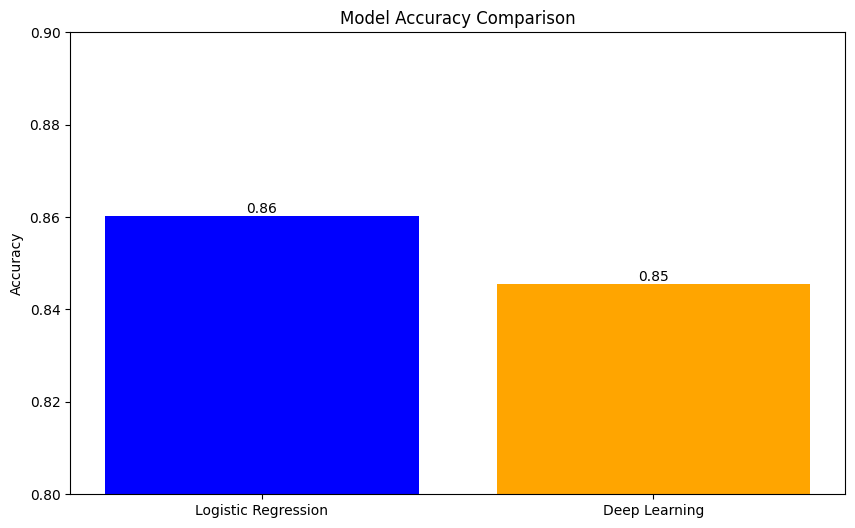

In [25]:
import matplotlib.pyplot as plt

# Assuming you have the accuracy scores from earlier stored in these variables
accuracy_log_reg = 0.8602941176470589  # replace with your actual score if different
accuracy_deep_learning = 0.845588207244873  # replace with your actual score if different

# Labels for your bar chart
labels = ['Logistic Regression', 'Deep Learning']

# Values, which are the accuracy rates
values = [accuracy_log_reg, accuracy_deep_learning]

# Create a bar chart
plt.figure(figsize=(10, 6))

# Create bars with different colors
plt.bar(labels, values, color=['blue', 'orange'])

# Add title and labels
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.8, 0.9)  # Set the limit of y-axis to be a little less than min accuracy and a little more than max accuracy

# Display the actual value on top of each bar for clarity
for i in range(len(values)):
    plt.text(i, values[i], f'{values[i]:.2f}', ha = 'center', va = 'bottom')

# Show the plot
plt.show()